In [2]:
# Environment Setup
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
sym.init_printing(use_latex='mathjax')
from IPython.display import display, Markdown, Math

# Predictive Filtering

Lots of systems behave according to first order.

     -t
1 - ℯ  

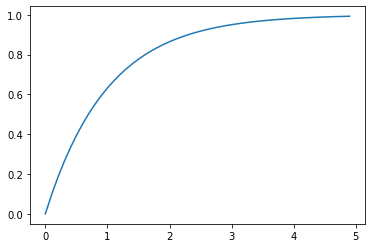

In [50]:
K, T = sym.symbols('K, T', real=True)
s = sym.symbols('s')
td, t = sym.symbols('t_d, t', real=True, positive = True)

# Laplace Transform of Unit Step
H = 1/s 

# Laplace Transform of a First-Order System
F = K/(T*s + 1)


# Plot the Unit Step Response.
# Sympy can't find Heavyside function without some help when we Lambdify a function.
modules = [{'Heaviside': lambda x: np.heaviside(x, 1)}, 'numpy']
f_unit_step_response = sym.inverse_laplace_transform(F*H, s, t).subs({T: 1, K: 1, td: 1})
display(f_unit_step_response)
lambda_f = sym.lambdify(t, f_unit_step_response, modules=modules)


time_series = np.arange(0, 5, 0.1)
f_series = np.array([lambda_f(t) for t in time_series])


plt.plot(time_series, f_series)
plt.show()

If we know the unit step response of the system, we actually know quite a bit about the system.

In fact, given any moment in this curve, we can use the time constant to predict where the curve will settle.

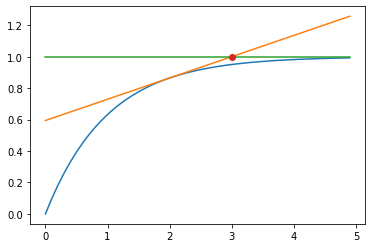

In [54]:
givens = \
{t: 2}

# Take the derivative with respect to t. Evaluate at t=2
slope = sym.diff(f_unit_step_response, t).subs(givens)
point_fn = f_unit_step_response.subs(givens)

# Point-Slope Formula to get a line equation
l = slope * (t - givens[t]) + point_fn

# Get the limit of the original function to plot the DiffyQ steady state value.
steady_state_val = sym.limit(f_unit_step_response, t, sym.oo)

# Get the point at which the linearization intersects the steady state time.
# Intersection time is one time constant away from the point we linearized around.
tau = 1 # Unfortunately, we have to look at unit step response to get this value.
intersection_time = givens[t] + tau

# Plotting
lambda_l = sym.lambdify(t, l, modules=modules)
l_series = np.array([lambda_l(t) for t in time_series])
ss_series = np.array([steady_state_val for t in time_series])

plt.plot(time_series, f_series)
plt.plot(time_series, l_series)
plt.plot(time_series, ss_series)


plt.plot([intersection_time], [lambda_l(intersection_time)], marker='o')
plt.show()

The result above is pretty powerful. Given *just* the system's time constant, we can use a small time window to approximate the slope and then get the tangent line to extrapolate what value the system will settle at.

# References

1. https://www.youtube.com/watch?v=1mvZHN5ew5M&t=3s&ab_channel=nerdkits